### Tom Mahoney (tmahoney@emporia.edu)

### Rocks Game

* There are two piles of rocks.
* Two players take turns removing rocks.
* A player may remove 1 rock from either pile or may remove 1 rock from both piles.
* The player who removes the last rock wins.

In [9]:
import time

# Memoization
memo = dict()

def rocks(n,m):
    # base case
    if n == m == 0:
        return -1
    else:
        if (n,m) in memo:
            return memo[(n,m)]
        # induction step
        # MOVE GENERATION
        moves = []
        if n > 0:
            moves.append( (n-1, m) )
        if m > 0:
            moves.append( (n, m-1) )
        if m > 0 and n > 0:
            moves.append( (n-1, m-1) )
        # You want the position you give the opponent to be as bad (for them) as possible
        # So we take the minimum of those values.
        # The current player's value is then the negative of that minimum.
        val = -1 * min([ rocks(nbr[0], nbr[1]) for nbr in moves ])
        memo[(n,m)] = val
        return val 
    
start = time.time()
for i in range(100):
    for j in range(100):
        if rocks(i,j) < 0:
            continue
end = time.time()
print(end-start)


0.15204286575317383


### Lister--Painter game:

Played on a simple graph $G$ where each vertex $v$ has some positive number $f(v)$ of "tokens".
Two players **Lister** and **Painter** take turns.
Lister **marks** a nonempty subset of uncolored vertices; each marked vertex loses a token.
Painter **colors** an independent subset of the marked vertices.

Lister wins by marking a vertex with no tokens.
Painter wins by preventing this, which results in a proper coloring of $G$.

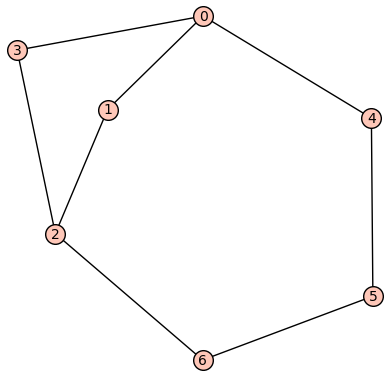

-1
0.217329740524292


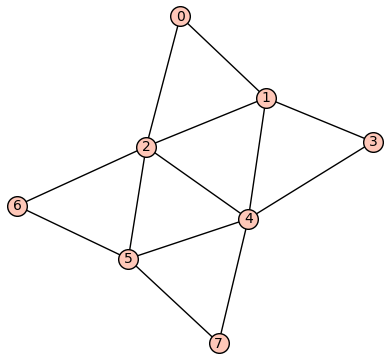

In [16]:
from sage.graphs.independent_sets import IndependentSets

def makekey(G,tokens):
    L = []
    for v in G.vertices():
        L.append( tuple( [v] + G.neighbors(v) + [tokens[v]] ))
    return tuple(L)
paintmemo = dict()
def paint(G,tokens):
    if len(G.vertices()) == 0:
        return 1
    if min([tokens[v] for v in G.vertices()]) == 0:
        return -1
    key = makekey(G,tokens)
    if key in paintmemo:
        return paintmemo[key]
    # move generation
    for H in G.connected_subgraph_iterator():
        marked_set = H.vertices()
        tokens2 = { v : tokens[v] - 1 if v in marked_set else tokens[v] for v in G.vertices() }
        for colored_set in IndependentSets(H, maximal=True):
            G2 = G.copy()
            G2.delete_vertices(colored_set)
            if paint(G2,tokens2) == 1:
                break
        else:
            paintmemo[key] = -1
            return -1
    paintmemo[key] = 1
    return 1

G = Graph()
edges = [(0,1),(1,2),(2,3),(3,0),(0,4),(4,5),(5,6),(6,2)]
G.add_edges(edges)
G.show()
tokens = (2,2,2,2,2,2,2)

start = time.time()
print(paint(G,tokens))
end = time.time()
print(end-start)

# This is an example of a Graph6 string, which is a way of encoding graphs used by NAUTY and GenG.
# I use those programs to generate text files of the graphs I'm interested in, 
# then I read them in to Sage to turn into actual graphs.
Graph("Gy[hGW").show()

In [ ]:
# This is a superior "makekey" function. The core idea is the "canonical_label" function,
# which can detect isomorphic graphs even if the vertices are in a different order.
# This is a good place to put any further case-reductions such as the "degeneracy" code I have below.
def canon(g,tokens):
    r"""
    Given simple graph g and token assignment "tokens"
    Encode the token counts in the graph by adding the corresponding number of loops at each vertex
    Check for losing positions (vertex with 0 tokens) and degenerate positions (removing vxs with more tokens than degree)
    Then put the resulting graph in canonical form to store for memo lookups
    """
    if min([tokens[v] for v in tokens]) == 0:
        return Graph(graphs.CompleteGraph(1).canonical_label(),immutable=True)
    gcopy = g.copy()
    g2 = Graph(g,multiedges=True,loops=True)
    for v in g2.vertices():
        g2.add_edges([(v,v)]*tokens[v])
    # Degeneracy checks optional: add in later
    # degenerate = [v for v in g2.vertices() if g.degree(v) < tokens[v]]
    # while len(degenerate)>0 and len(g2.vertices())>1:
    #     v = degenerate.pop()
    #     if gcopy.degree(v) < tokens[v]:
    #         degenerate += [u for u in gcopy.neighbors(v) if u not in degenerate]
    #         g2.delete_vertex(v)
    #         gcopy.delete_vertex(v)
    return Graph(g2.canonical_label(),immutable=True)


def paint3(G,tokens):
    if len(G.vertices()) == 0:
        return 1
    if min([tokens[v] for v in G.vertices()]) == 0:
        return -1
    key = canon(G,tokens)
    if key in memo:
        return memo[key]
    for H in G.connected_subgraph_iterator():
        markset = H.vertices()
        tokens2 = { v : tokens[v] - 1 if v in H.vertices() else tokens[v] for v in G.vertices() }
        for colorset in IndependentSets(H, maximal = True):
            G2 = G.copy()
            G2.delete_vertices(colorset)
            if paint3(G2,tokens2) == 1:
                break
        else:
            memo[key] = -1
            return -1
    memo[key] = 1
    return 1

K1 = graphs.CompleteGraph(1)
memo = {canon(K1,{0:0}):-1, canon(K1,{0:1}):1 }
start = time.time()
print(paint2(G,tokens))
end = time.time()
print(end-start)